# Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import textwrap

/var/folders/tz/kqjqqhfd34b3w6b4vf49lc6h0000gs/T/ipykernel_17333/2545208203.py:60: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([textwrap.fill(r, 10) for r in race_order], rotation=45, ha="right")
/var/folders/tz/kqjqqhfd34b3w6b4vf49lc6h0000gs/T/ipykernel_17333/2545208203.py:60: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([textwrap.fill(r, 10) for r in race_order], rotation=45, ha="right")
/var/folders/tz/kqjqqhfd34b3w6b4vf49lc6h0000gs/T/ipykernel_17333/2545208203.py:60: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([textwrap.fill(r, 10) for r in race_order], rotation=45, ha="right")


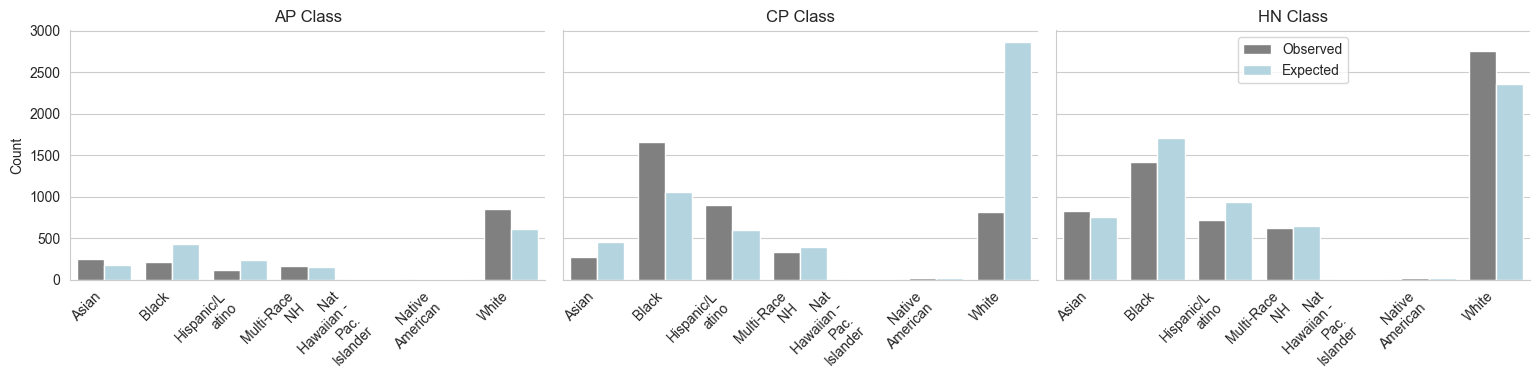

In [ ]:
# Load your CSV
csv_path = "Chart.csv"
df = pd.read_csv(csv_path)

# Rename columns for clarity
df.columns = [
    "Race",
    "HN_Expected", "HN_Observed",
    "CP_Expected", "CP_Observed",
    "AP_Expected", "AP_Observed"
]

# Remove any rows that are empty or header artifacts
df = df[df["Race"].notna() & (df["Race"] != "Race")]

# Melt the dataframe to long format for seaborn
df_melted = pd.melt(
    df,
    id_vars=["Race"],
    value_vars=[
        "HN_Expected", "HN_Observed",
        "CP_Expected", "CP_Observed",
        "AP_Expected", "AP_Observed"
    ],
    var_name="Class_Type",
    value_name="Count"
)

# Split "Class_Type" into separate "Class" and "Type" columns
df_melted["Class"] = df_melted["Class_Type"].str.split("_").str[0]
df_melted["Type"] = df_melted["Class_Type"].str.split("_").str[1]
df_melted.drop(columns=["Class_Type"], inplace=True)

# Ensure Count is numeric
df_melted["Count"] = pd.to_numeric(df_melted["Count"], errors="coerce")

# Define plot order
class_order = ["AP", "CP", "HN"]
race_order = df["Race"].tolist()

# Plot
sns.set_style("whitegrid")
g = sns.catplot(
    data=df_melted,
    kind="bar",
    x="Race", y="Count",
    hue="Type",
    col="Class",
    hue_order=["Observed", "Expected"],
    col_order=class_order,
    order=race_order,
    palette={"Observed": "grey", "Expected": "lightblue"},
    height=4, aspect=1.2
)


# Customize each facet
for ax, title in zip(g.axes.flat, ["AP Class", "CP Class", "HN Class"]):
    ax.set_title(title)
    ax.set_xticklabels([textwrap.fill(r, 10) for r in race_order], rotation=45, ha="right")

g.set_axis_labels("", "Count")
g._legend.set_title("")
g._legend.remove()  # remove default legend
plt.legend(loc='upper center')
plt.tight_layout()
plt.savefig("AP_Race.png")
plt.show()


/var/folders/tz/kqjqqhfd34b3w6b4vf49lc6h0000gs/T/ipykernel_17333/3918783380.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([textwrap.fill(r, 10) for r in race_order], rotation=45, ha="right")


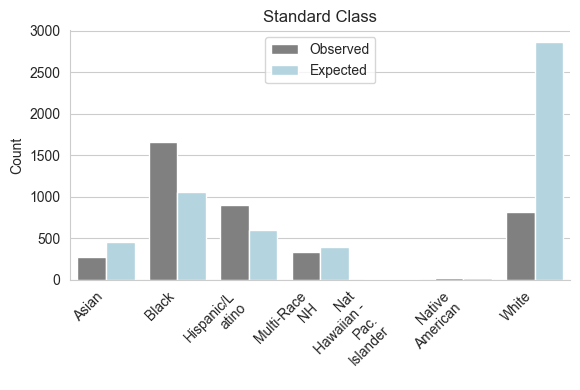

In [40]:
# Melt the dataframe to long format for seaborn
df_melted = pd.melt(
    df,
    id_vars=["Race"],
    value_vars=[
        "CP_Expected", "CP_Observed"
    ],
    var_name="Class_Type",
    value_name="Count"
)

# Split "Class_Type" into separate "Class" and "Type" columns
df_melted["Class"] = df_melted["Class_Type"].str.split("_").str[0]
df_melted["Type"] = df_melted["Class_Type"].str.split("_").str[1]
df_melted.drop(columns=["Class_Type"], inplace=True)

# Ensure Count is numeric
df_melted["Count"] = pd.to_numeric(df_melted["Count"], errors="coerce")

# Define plot order
class_order = ["CP"]
race_order = df["Race"].tolist()

# Plot
sns.set_style("whitegrid")
g = sns.catplot(
    data=df_melted,
    kind="bar",
    x="Race", y="Count",
    hue="Type",
    col="Class",
    hue_order=["Observed", "Expected"],
    col_order=class_order,
    order=race_order,
    palette={"Observed": "grey", "Expected": "lightblue"},
    height=4, aspect=1.2
)


# Customize each facet
for ax, title in zip(g.axes.flat, ["Standard Class"]):
    ax.set_title(title)
    ax.set_xticklabels([textwrap.fill(r, 10) for r in race_order], rotation=45, ha="right")

g.set_axis_labels("", "Count")
g._legend.set_title("")
g._legend.remove()  # remove default legend
plt.legend(loc='upper center')
plt.tight_layout()
plt.savefig("Standard_Race.png")
plt.show()
